In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm_notebook
import matplotlib.colors
import imageio
import seaborn as sns

import os
from sklearn.metrics import log_loss,mean_squared_error,accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
def display_numpy_array(folder_path,image_no):
    files = os.listdir(folder_path)
    file_path = os.path.join(folder_path,files[image_no])
    if file_path[-4:] == '.mat':
#     if image_no == 31:
        return 0,0
    image = Image.open(file_path)
#     image = image.convert('L')
    arr = np.array(image)
    print(arr[100:140,105:120])
    image = Image.fromarray(arr[100:140,105:120])
    plt.imshow(image)
#     newImage = arr[0:260,0:]
#     temp = arr.resize(300,1000)
#     img2 = Image.fromarray(temp,'L')
#     plt.imshow(img2)
#     print(arr.shape)

In [0]:
def displayImage(file_path):
    image = Image.open(file_path)
    image = image.convert('L')
    plt.imshow(image)
    plt.show()

In [0]:
def image_resize(file_path):
    image = Image.open(file_path)
    size = image.size
#     ratio = 0.2  # reduced the size to 90% of the input image
#     reduced_size = int(size[0] * ratio), int(size[1] * ratio)
    reduced_size = 836,552
    im_resized = image.resize(reduced_size, Image.ANTIALIAS)
    return im_resized
#     plt.imshow(im_resized)
#     plt.show()

In [0]:
def read_single_image(folder_path,image_no):
    files = os.listdir(folder_path)
    file_path = os.path.join(folder_path,files[image_no])
    if file_path[-4:] == '.mat':
#     if image_no == 31:
        return
#     print(image_no,' ',file_path)
    displayImage(file_path)
    img = image_resize(file_path)
    plt.imshow(img)
#     display_numpy_array(file_path)

In [0]:
def find_median_size(folder_path,image_no):
    files = os.listdir(folder_path)
    file_path = os.path.join(folder_path,files[image_no])
    if file_path[-4:] == '.mat':
#     if image_no == 31:
        return 0,0
    image = Image.open(file_path)
    size = image.size
    return size[0],size[1]

In [0]:
# read_single_image('put path','index of image')
X = []
Y = []
for i in range(54):
    x,y = find_median_size("./drive/My Drive/Untitled folder/signature/004",i)
    X.append(x)
    Y.append(y)
X = np.array(X)
Y = np.array(Y)
print(int(np.median(X)),int(np.median(Y)))
# for i in range(54):
#     read_single_image("./drive/My Drive/Untitled folder/signature/001",i)

This clearly shows that I need to bring all the images to the same shape because all images have different shape.

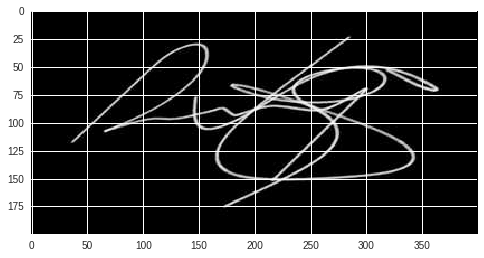

In [16]:
read_single_image("./drive/My Drive/Untitled folder/signature/010",0)
# display_numpy_array("./drive/My Drive/Untitled folder/signature/001",0)

In [0]:
folder_names = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021','022','023','024','025','026','027','028','029','030','031','032','033','034','035','036','037','038','039','040','041','042','043','044','045','046','047','048','049','050','051','052','053','054','055','056','057','058','059','060','061','062','063','064','065','066','067','068','069','070','071','072','073','074','075','076','077','078','079','080','081','082','083','084','085','086','087','088','089','090','091','092','093','094','095','096','097','098','099','100',
'101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200']
# folder_names = ['001','002','003','004']
# for i in range(101,201):
#     print(f"'{i}'",end = ',')

In [0]:
def read_all(folder_path):
#     print("reading")
    images = {}
    files = os.listdir(folder_path)
#     for i, file_name in tqdm_notebook(enumerate(files),total = len(files)):
    for file_name in files:
        file_path = os.path.join(folder_path,file_name)
        if file_path[-4:] == '.mat':
            continue
        image_index = file_name[:-4]
#         image = Image.open(file_path)
        image = image_resize(file_path)
        images[image_index] = np.array(image.copy()).flatten()
        image.close()
    return images
        

In [0]:
images_train = {}
print("reading")
for i, ele in tqdm_notebook(enumerate(folder_names),total = len(folder_names)):
#     print('reading')
    images_train.update(read_all('./drive/My Drive/signature/folder'+ele))

reading


In [0]:
# list(images_train.keys())[:5]

In [0]:
X = []
Y = []
for key,value in images_train.items():
    X.append(value)
    if key[:2] == 'cf':
        Y.append(0)
    else:
        Y.append(1)
    
X = np.array(X)
Y = np.array(Y)

In [0]:
# len(images_train)
images_train.clear()

In [0]:
print(X.shape,Y.shape)

(10800, 45000) (10800,)


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 0)

In [0]:
X_train[0].shape

(45000,)

In [0]:
Y_train.shape

(8640,)

In [0]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_test,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(8640, 2) (2160, 2)


In [0]:
# X.clear()
# Y.clear()

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False,display_weight = False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
#       print(self.b,' ',db)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
        
      if display_weight:
        weight_matrices.append(self.b.reshape(1,1))
        
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

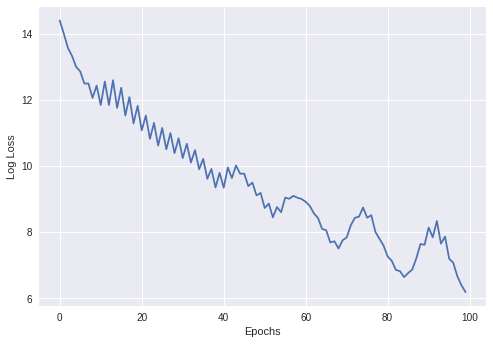

In [0]:
weight_matrices = []
sn_ce = SigmoidNeuron()
sn_ce.fit(X_train, Y_train, epochs=100,learning_rate=0.0001, loss_fn="ce", display_loss=True,display_weight = True)

In [0]:
sn_ce.fit(X_train, Y_train, epochs=500, initialise = False,learning_rate=0.0001, loss_fn="ce", display_loss=True)

In [0]:
def display_plot(Y_pred_train,Y_train,length):
    maxi = 1.0e-64
    mini = 2.0
    for i in range(length):
        if Y_train[i] == 0:
            maxi = max(maxi,Y_pred_train[i])
        if Y_train[i] == 1:
            mini = min(mini,Y_pred_train[i])
    print('maxi = ',maxi)
    print('mini = ',mini)
    index = list(i for i in range(length))
    for i in range(length):
        if Y_train[i] == 1:
            temp = 'g'
        else:
            temp = 'r'
        plt.plot(i,Y_pred_train[i],'*',color = temp)

In [0]:
Y_pred = sn_ce.predict(X_test)
print(Y_pred)

In [0]:
def print_accuracy(sn):
  Y_pred_test = sn.predict(X_test)
  Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_test, Y_test)
  print("Train Accuracy : ", accuracy_train)
  print("-"*50)
  print(Y_pred_binarised_test[0:50])
#   display_plot(Y_pred_test,Y_test,len(Y_pred_test))

In [0]:
print_accuracy(sn_ce)

Train Accuracy :  0.5185185185185185
--------------------------------------------------
[1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 1]


In [0]:
Y_train[:50]

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [0]:
Y_test[:50]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [0]:
Y_pred_train = sn_ce.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_train)
print(accuracy_train)

0.6861111111111111


In [0]:
class Vectorized_ff_nn:
    def __init__(self,W1,W2):
        self.W1 = W1.copy()  # this is deep copy, we are not just providing the reference
        self.W2 = W2.copy()
        self.B1 = np.zeros((1,20))
        self.B2 = np.zeros((1,2))
    
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def softmax(self,x):
        exps = np.exp(x)
        return exps / np.sum(exps)
    
    def forward_pass(self,x):
        x = x.reshape(1,-1)
        self.A1 = np.matmul(x,self.W1) + self.B1 # (1,5000) * (5000,20) -> (1,20) + (1,20) -> (1,20)
        self.H1 = self.sigmoid(self.A1) # (1,20)
        self.A2 = np.matmul(self.H1,self.W2) + self.B2  # (1,20) * (20,1) -> (1,1) + (1,1) -> (1,1)
        self.H2 = self.softmax(self.A2) # (1,1)
        return self.H2
    
    def grad_sigmoid(self,x):
        return x*(1-x)
    
    def grad(self,x,y):
        self.forward_pass(x)
        x = x.reshape(1,-1)   # (1,5000)
        y = y.reshape(1,-1)   # (1,1)
        
#         print(self.H2.shape)
        self.dA2 = self.H2 - y   # (1,1) - (1,1) -> (1,1)
#         print(self.dA2.shape)
        
        self.dW2 = np.matmul(self.H1.T,self.dA2)   # (20,1) * (1,1)
        self.dB2 = self.dA2
        self.dH1 = np.matmul(self.dA2,self.W2.T)
        self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1))
        
        self.dW1 = np.matmul(x.T,self.dA1)
        self.dB1 = self.dA1
        
    def fit(self, X, Y, epochs = 1,learning_rate = 1, display_loss = False):
        if display_loss:
            loss = {}
            
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dW1 = np.zeros((5000,20))
            dW2 = np.zeros((20,2))
            dB1 = np.zeros((1,20))
            dB2 = np.zeros((1,2))
            
            for x,y in zip(X,Y):
                self.grad(x,y)
                dW1 += self.dW1
                dW2 += self.dW2
                dB1 += self.dB1
                dB2 += self.dB2
                
            m = X.shape[0]
            self.W2 -= learning_rate * (dW2/m)
            self.B2 -= learning_rate * (dB2/m)
            self.W1 -= learning_rate * (dW1/m)
            self.B1 -= learning_rate * (dB1/m)
            
            if display_loss:
                Y_pred = self.predict(X)
#                 Y_pred.reshape(-1,1)
#                 print(Y_pred.shape)
#                 print(Y.shape)
                loss[i] = log_loss(np.argmax(Y,axis = 1),Y_pred)

                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
    
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()

In [0]:
class VectorizedInput_ff_nn:
    def __init__(self,W1,W2):
        self.W1 = W1.copy()  # this is deep copy, we are not just providing the reference
        self.W2 = W2.copy()
        self.B1 = np.zeros((1,3))
        self.B2 = np.zeros((1,2))
    
    def sigmoid(self,X):
        return 1.0/(1.0 + np.exp(-X))
    
    def softmax(self,X):
        exps = np.exp(X)
        return exps / np.sum(exps,axis = 1).reshape(-1,1)
    
    def forward_pass(self,X):
        self.A1 = np.matmul(X,self.W1) + self.B1 # (1,5000) * (5000,3) -> (1,3) + (1,3) -> (1,3)
#         print('A1')
#         print(self.A1[2])
        self.H1 = self.sigmoid(self.A1) # (1,2)
#         print('H1')
#         print(self.H1[2])
        self.A2 = np.matmul(self.H1,self.W2) + self.B2  # (1,2) * (2,4) -> (1,4) + (1,4) -> (1,4)
#         print('A2')
#         print(self.A2[0])
        self.H2 = self.softmax(self.A2) # (1,4)
#         print('H2')
#         print(self.H2[0])
        return self.H2
    
    def grad_sigmoid(self,X):
        return X*(1-X)
    
    def grad(self,X,Y):
        self.forward_pass(X)
#         x = x.reshape(1,-1)   # (1,2)
#         y = y.reshape(1,-1)   # (1,4)

        m = X.shape[0]
        
        self.dA2 = self.H2 - Y
#         print('dA2')
#         print(self.dA2[0])
        
        self.dW2 = np.matmul(self.H1.T,self.dA2)
        
#         print('dW2')
#         print(self.dW2[0])
        
        self.dB2 = np.sum(self.dA2,axis = 0).reshape(1,-1)
#         print('dB2')
#         print(self.dB2[0])
        
        self.dH1 = np.matmul(self.dA2,self.W2.T)
        
#         print('dH1')
#         print(self.dH1[0])
        
        self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1))
        
#         print('dA1')
#         print(self.dA1[0])
        
        self.dW1 = np.matmul(X.T,self.dA1)
        self.dB1 = np.sum(self.dA1,axis = 0).reshape(1,-1)
        
#         print('dB1')
#         print(self.dB1[0])
        
    def fit(self, X, Y, epochs = 1,learning_rate = 1, display_loss = False, display_weight = False):
        if display_loss:
            loss = {}
            
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
#             dW1 = np.zeros((2,2))
#             dW2 = np.zeros((2,4))
#             dB1 = np.zeros((1,2))
#             dB2 = np.zeros((1,4))
            
#             for x,y in zip(X,Y):
            self.grad(X,Y)
#                 dW1 += self.dW1
#                 dW2 += self.dW2
#                 dB1 += self.dB1
#                 dB2 += self.dB2
                
            m = X.shape[0]
            self.W2 -= learning_rate * (self.dW2/m)
            self.B2 -= learning_rate * (self.dB2/m)
            self.W1 -= learning_rate * (self.dW1/m)
            self.B1 -= learning_rate * (self.dB1/m)
            
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = log_loss(np.argmax(Y, axis = 1),Y_pred)
#             print(loss[i])
            
            if display_weight:
#                 print(self.W2)
#                 print(' ')
                weight_matrices.append(self.W2)
                grad_weights.append(self.dW2)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
    
    def predict(self, X):
        Y_pred = self.forward_pass(X)
        return np.array(Y_pred).squeeze()

In [0]:
# W1 = np.random.rand(5000,3) # (2,2)
# W2 = np.random.rand(3,2) # (2,4)

W1 = np.random.uniform(low=-0.001, high=0.001, size=(45000,3) )
W2 = np.random.uniform(low=-0.001, high=0.001, size=(3,2) )

In [0]:
W2

array([[-3.44105903e-04,  9.55651736e-04],
       [-4.36970215e-05, -5.01430737e-04],
       [ 9.90724052e-04,  6.54384482e-04]])

In [0]:
X_train.shape

(8640, 45000)

In [0]:
# obj = Vectorized_ff_nn(W1,W2)
# obj.fit(X_train, y_OH_train, epochs=100, learning_rate=0.0001, display_loss=True)

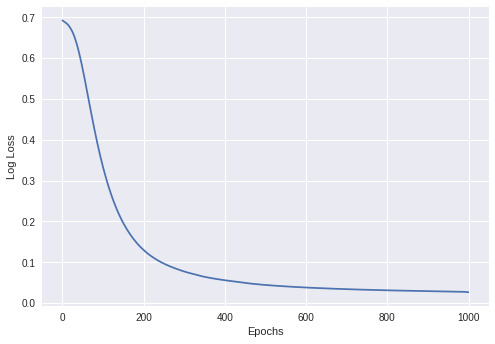

In [0]:
weight_matrices = []
grad_weights = []
obj2 = VectorizedInput_ff_nn(W1,W2)
obj2.fit(X_train,y_OH_train,epochs=1000,learning_rate=0.1,display_loss=True,display_weight = True)

In [0]:
Y_pred_train = obj2.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_test = obj2.predict(X_test)
Y_pred_test = np.argmax(Y_pred_test,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_test = accuracy_score(Y_pred_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_test, 2))

Training accuracy 1.0
Validation accuracy 0.62


Now the only option for me is to check the weights i.e. how they are transitioning

In [0]:
def plot_heat_map(epoch):
    fig = plt.figure(figsize = (2,2))
    sns.heatmap(weight_matrices[epoch],annot = True,cmap = my_cmap,vmin = -5,vmax = 5)
    plt.title("Epoch"+str(epoch))
    
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    return image

In [0]:
imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//10)], fps=1)

In [0]:
imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//2)], fps=1)